## 206-shinahaudrey-midterm-part3

**•Research Question: What insights might be derived from studying Seoul’s transportation network that could inform the transit-oriented development of Los Angeles?**   

**• Please see '206-shinahaudrey-midterm-part1' for detailed description about the project.**

**•This notebook'206-shinahaudrey-midterm-part3', written by Shinah, is about identifying areas in LA County and Seoul that choose public transit and car the most when commuting. This is part of Step3 and Step5 in the flowchart in '206-shinahaudrey-midterm-part1'. The analysis level for LA is census tract and 'administration dong' for Seoul.** 

### Exploring Commute Data in Los Angeles County

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

This population dataset is downloaded from [Censusreporter](https://censusreporter.org/). The title of dataset is 'Means of transportation to work'.

In [2]:
LA_com = gpd.read_file('data/acs2019_5yr_B08006_14000US06037534001.geojson')

In [3]:
LA_com.shape

(2347, 105)

In [4]:
LA_com.head()

,geoid,name,B08006001,"B08006001, Error",B08006002,"B08006002, Error",B08006003,"B08006003, Error",B08006004,"B08006004, Error",...,"B08006047, Error",B08006048,"B08006048, Error",B08006049,"B08006049, Error",B08006050,"B08006050, Error",B08006051,"B08006051, Error",geometry
0,05000US06037,"Los Angeles County, CA",4811408.0,9061.0,4016706.0,10739.0,3560471.0,10203.0,456235.0,6351.0,...,197.0,8085.0,698.0,65092.0,1756.0,33633.0,1477.0,137565.0,3063.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,253.0,1860.0,265.0,1656.0,270.0,204.0,80.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,49.0,32.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,175.0,1730.0,178.0,1617.0,186.0,113.0,91.0,...,12.0,0.0,12.0,0.0,12.0,8.0,12.0,56.0,39.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,438.0,2699.0,411.0,2430.0,356.0,269.0,197.0,...,17.0,0.0,17.0,31.0,49.0,87.0,67.0,74.0,74.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,202.0,1439.0,200.0,1323.0,201.0,116.0,67.0,...,12.0,0.0,12.0,8.0,13.0,15.0,21.0,63.0,52.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [5]:
LA_com = LA_com.drop([0])

In [6]:
LA_com.head()

,geoid,name,B08006001,"B08006001, Error",B08006002,"B08006002, Error",B08006003,"B08006003, Error",B08006004,"B08006004, Error",...,"B08006047, Error",B08006048,"B08006048, Error",B08006049,"B08006049, Error",B08006050,"B08006050, Error",B08006051,"B08006051, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,253.0,1860.0,265.0,1656.0,270.0,204.0,80.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,49.0,32.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,175.0,1730.0,178.0,1617.0,186.0,113.0,91.0,...,12.0,0.0,12.0,0.0,12.0,8.0,12.0,56.0,39.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,438.0,2699.0,411.0,2430.0,356.0,269.0,197.0,...,17.0,0.0,17.0,31.0,49.0,87.0,67.0,74.0,74.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,202.0,1439.0,200.0,1323.0,201.0,116.0,67.0,...,12.0,0.0,12.0,8.0,13.0,15.0,21.0,63.0,52.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1782.0,220.0,1538.0,214.0,1457.0,214.0,81.0,62.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,89.0,46.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


I want to see the list and leave only what I want.

In [7]:
list(LA_com)

['geoid',
 'name',
 'B08006001',
 'B08006001, Error',
 'B08006002',
 'B08006002, Error',
 'B08006003',
 'B08006003, Error',
 'B08006004',
 'B08006004, Error',
 'B08006005',
 'B08006005, Error',
 'B08006006',
 'B08006006, Error',
 'B08006007',
 'B08006007, Error',
 'B08006008',
 'B08006008, Error',
 'B08006009',
 'B08006009, Error',
 'B08006010',
 'B08006010, Error',
 'B08006011',
 'B08006011, Error',
 'B08006012',
 'B08006012, Error',
 'B08006013',
 'B08006013, Error',
 'B08006014',
 'B08006014, Error',
 'B08006015',
 'B08006015, Error',
 'B08006016',
 'B08006016, Error',
 'B08006017',
 'B08006017, Error',
 'B08006018',
 'B08006018, Error',
 'B08006019',
 'B08006019, Error',
 'B08006020',
 'B08006020, Error',
 'B08006021',
 'B08006021, Error',
 'B08006022',
 'B08006022, Error',
 'B08006023',
 'B08006023, Error',
 'B08006024',
 'B08006024, Error',
 'B08006025',
 'B08006025, Error',
 'B08006026',
 'B08006026, Error',
 'B08006027',
 'B08006027, Error',
 'B08006028',
 'B08006028, Error',
 

I checked the metadata and selected some columns that I want to keep.   

•'geoid':geoid of the census tract     
•'name':name of the census tract   
•'B08006001' : Total   
•'B08006002' : Car, truck, or van   
•'B08006008' : Public transportation (excluding taxicab)   
•'B08006014' : Bicycle     
•'B08006015' : Walked   
•'B08006016' : Taxicab, motorcycle, or other means   
•'B08006017' : Worked from home   
•'geometry' : long lat coordinates   

In [8]:
LA_com_columnstokeep = ['geoid',
 'name',
 'B08006001',
 'B08006002',
 'B08006008',
 'B08006014',
 'B08006015',
 'B08006016',
 'B08006017',
 'geometry']

In [9]:
LA_com = LA_com[LA_com_columnstokeep]

In [10]:
LA_com.columns = ['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Public transportation (excluding taxicab)',
 'Bicycle',
 'Walked',
 'Taxicab, motorcycle, or other means',
 'Worked from home',
'geometry']

In [11]:
LA_com.head()

,geoid,name,Total,"Car, truck, or van",Public transportation (excluding taxicab),Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,1860.0,59.0,0.0,0.0,26.0,82.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,1730.0,9.0,0.0,10.0,8.0,77.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,2699.0,68.0,0.0,74.0,87.0,129.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,1439.0,48.0,0.0,8.0,30.0,68.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1782.0,1538.0,26.0,0.0,0.0,0.0,218.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


I left what I only need for the analysis.

In [12]:
LA_com.describe()

,Total,"Car, truck, or van",Public transportation (excluding taxicab),Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home
count,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000
mean,2050.898551,1712.150895,119.236999,15.954817,55.269395,33.757460,114.528986
std,803.753324,718.203253,138.697441,29.525481,100.223456,36.932827,104.144505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1523.000000,1227.250000,33.000000,0.000000,9.000000,8.000000,44.000000
50%,1989.000000,1661.000000,79.000000,0.000000,30.000000,24.000000,84.000000
75%,2534.250000,2160.250000,151.000000,21.000000,64.000000,47.000000,154.750000
max,6829.000000,5528.000000,1551.000000,399.000000,1832.000000,262.000000,937.000000


The raw data itself is less meaningful than looking at the percent share within each census tracts. So I divide the columns by total number of commute trips.

In [13]:
LA_com['Percent Car, truck, or van'] = LA_com['Car, truck, or van']/LA_com['Total']*100
LA_com['Percent Public transportation (excluding taxicab)'] = LA_com['Public transportation (excluding taxicab)']/LA_com['Total']*100
LA_com['Percent Bicycle'] = LA_com['Bicycle']/LA_com['Total']*100
LA_com['Percent Walked'] = LA_com['Walked']/LA_com['Total']*100
LA_com['Percent Taxicab, motorcycle, or other means'] = LA_com['Taxicab, motorcycle, or other means']/LA_com['Total']*100
LA_com['Percent Worked from home'] = LA_com['Worked from home']/LA_com['Total']*100

In [14]:
LA_com.sample(3)

,geoid,name,Total,"Car, truck, or van",Public transportation (excluding taxicab),Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry,"Percent Car, truck, or van",Percent Public transportation (excluding taxicab),Percent Bicycle,Percent Walked,"Percent Taxicab, motorcycle, or other means",Percent Worked from home
98,14000US06037113303,"Census Tract 1133.03, Los Angeles, CA",2049.0,1766.0,77.0,18.0,25.0,33.0,130.0,"MULTIPOLYGON (((-118.59847 34.24997, -118.5973...",86.188385,3.757931,0.878477,1.220107,1.610542,6.344558
1716,14000US06037543702,"Census Tract 5437.02, Los Angeles, CA",3350.0,2853.0,140.0,0.0,79.0,85.0,193.0,"MULTIPOLYGON (((-118.27553 33.80936, -118.2755...",85.164179,4.179104,0.000000,2.358209,2.537313,5.761194
508,14000US06037203100,"Census Tract 2031, Los Angeles, CA",1866.0,1604.0,190.0,14.0,48.0,0.0,10.0,"MULTIPOLYGON (((-118.20288 34.05456, -118.2028...",85.959271,10.182208,0.750268,2.572347,0.000000,0.535906


In [15]:
LA_com['Percent Car, truck, or van'].describe()

count    2322.000000
mean       83.025847
std        11.175785
min         0.000000
25%        79.306499
50%        85.715950
75%        90.246734
max       100.000000
Name: Percent Car, truck, or van, dtype: float64

In [16]:
LA_com['Percent Public transportation (excluding taxicab)'].describe()

count    2322.000000
mean        6.145910
std         7.324507
min         0.000000
25%         1.821929
50%         3.870545
75%         7.777968
max       100.000000
Name: Percent Public transportation (excluding taxicab), dtype: float64

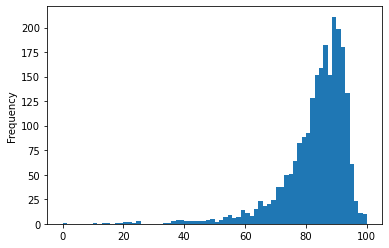

In [17]:
LA_com['Percent Car, truck, or van'].plot.hist(bins=70)

As expected, most of the census tract's percentage of choosing car as mode to work is tremendously high.

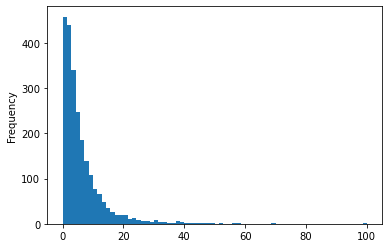

In [18]:
LA_com['Percent Public transportation (excluding taxicab)'].plot.hist(bins=70)

As opposed to the the histogram above, it is hard to find the census tract that uses public transit has a main mode to work.

I am going to see where are the region that has highest value for 'Percent Car, truck, or van'.

In [19]:
LA_com.sort_values(['Percent Car, truck, or van'], ascending=False)

,geoid,name,Total,"Car, truck, or van",Public transportation (excluding taxicab),Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry,"Percent Car, truck, or van",Percent Public transportation (excluding taxicab),Percent Bicycle,Percent Walked,"Percent Taxicab, motorcycle, or other means",Percent Worked from home
2329,14000US06037980014,"Census Tract 9800.14, Los Angeles, CA",9.0,9.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.26088 33.76850, -118.2602...",100.0,0.0,0.0,0.0,0.0,0.0
2339,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",5.0,5.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517...",100.0,0.0,0.0,0.0,0.0,0.0
2334,14000US06037980021,"Census Tract 9800.21, Los Angeles, CA",18.0,18.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.40183 34.26509, -118.4017...",100.0,0.0,0.0,0.0,0.0,0.0
2325,14000US06037980008,"Census Tract 9800.08, Los Angeles, CA",16.0,16.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.50267 34.22121, -118.5015...",100.0,0.0,0.0,0.0,0.0,0.0
1522,14000US06037504102,"Census Tract 5041.02, Los Angeles, CA",9.0,9.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.06397 33.89569, -118.0639...",100.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,14000US06037980030,"Census Tract 9800.30, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.43712 33.91639, -118.4299...",NaN,NaN,NaN,NaN,NaN,NaN
2343,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470...",NaN,NaN,NaN,NaN,NaN,NaN
2344,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505...",NaN,NaN,NaN,NaN,NaN,NaN
2345,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325...",NaN,NaN,NaN,NaN,NaN,NaN


oh, it seems the highest value is 100 and there are many of the rows that have 100. So I will select the rows that have 100 for 'Percent Car, truck, or van'.

In [20]:
LA_com.loc[LA_com['Percent Car, truck, or van'] == 100]

,geoid,name,Total,"Car, truck, or van",Public transportation (excluding taxicab),Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry,"Percent Car, truck, or van",Percent Public transportation (excluding taxicab),Percent Bicycle,Percent Walked,"Percent Taxicab, motorcycle, or other means",Percent Worked from home
1522,14000US06037504102,"Census Tract 5041.02, Los Angeles, CA",9.0,9.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.06397 33.89569, -118.0639...",100.0,0.0,0.0,0.0,0.0,0.0
2325,14000US06037980008,"Census Tract 9800.08, Los Angeles, CA",16.0,16.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.50267 34.22121, -118.5015...",100.0,0.0,0.0,0.0,0.0,0.0
2329,14000US06037980014,"Census Tract 9800.14, Los Angeles, CA",9.0,9.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.26088 33.76850, -118.2602...",100.0,0.0,0.0,0.0,0.0,0.0
2334,14000US06037980021,"Census Tract 9800.21, Los Angeles, CA",18.0,18.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.40183 34.26509, -118.4017...",100.0,0.0,0.0,0.0,0.0,0.0
2339,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",5.0,5.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517...",100.0,0.0,0.0,0.0,0.0,0.0


There are 5 census tracts, 1522, 2325, 2329, 2334, 2339. These will be used to conduct analysis in Step6 as car-centric census tracts in LA County.

Now, let's see what census tract has highest value for Percent Public transportation (excluding taxicab).

In [21]:
LA_com.sort_values(['Percent Public transportation (excluding taxicab)'], ascending=False)

,geoid,name,Total,"Car, truck, or van",Public transportation (excluding taxicab),Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry,"Percent Car, truck, or van",Percent Public transportation (excluding taxicab),Percent Bicycle,Percent Walked,"Percent Taxicab, motorcycle, or other means",Percent Worked from home
1123,14000US06037403200,"Census Tract 4032, Los Angeles, CA",40.0,0.0,40.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-117.82530 34.03414, -117.8252...",0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
570,14000US06037209402,"Census Tract 2094.02, Los Angeles, CA",2219.0,453.0,1544.0,28.0,123.0,36.0,35.0,"MULTIPOLYGON (((-118.27988 34.05388, -118.2797...",20.414601,69.580892,1.261830,5.543037,1.622352,1.577287
561,14000US06037208902,"Census Tract 2089.02, Los Angeles, CA",1478.0,379.0,859.0,47.0,166.0,4.0,23.0,"MULTIPOLYGON (((-118.27468 34.05739, -118.2736...",25.642760,58.119080,3.179973,11.231394,0.270636,1.556157
563,14000US06037208904,"Census Tract 2089.04, Los Angeles, CA",1996.0,467.0,1136.0,140.0,139.0,45.0,69.0,"MULTIPOLYGON (((-118.27185 34.05934, -118.2713...",23.396794,56.913828,7.014028,6.963928,2.254509,3.456914
537,14000US06037206300,"Census Tract 2063, Los Angeles, CA",850.0,131.0,447.0,0.0,216.0,1.0,55.0,"MULTIPOLYGON (((-118.25041 34.04326, -118.2490...",15.411765,52.588235,0.000000,25.411765,0.117647,6.470588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,14000US06037980030,"Census Tract 9800.30, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.43712 33.91639, -118.4299...",NaN,NaN,NaN,NaN,NaN,NaN
2343,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470...",NaN,NaN,NaN,NaN,NaN,NaN
2344,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505...",NaN,NaN,NaN,NaN,NaN,NaN
2345,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325...",NaN,NaN,NaN,NaN,NaN,NaN


Wow there is a census tract that have 100% for transit! Is it even possible? I wonder if the data is wrong..   
And the second goes to Census Tract 2094.02 which has 70%, and the third goes to Census Tract 2089.02 with 58%.

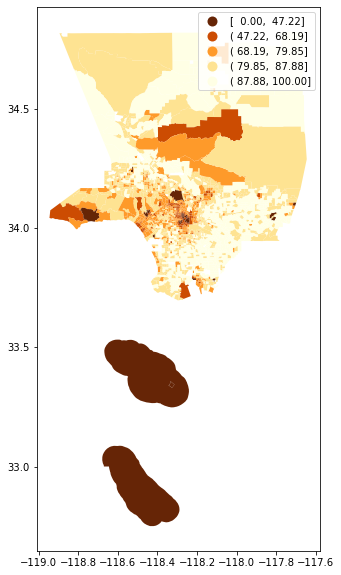

In [22]:
LA_com.plot(figsize=(12,10),
                 column='Percent Car, truck, or van',
                 legend=True, 
                 scheme='NaturalBreaks',
                 cmap='YlOrBr_r')

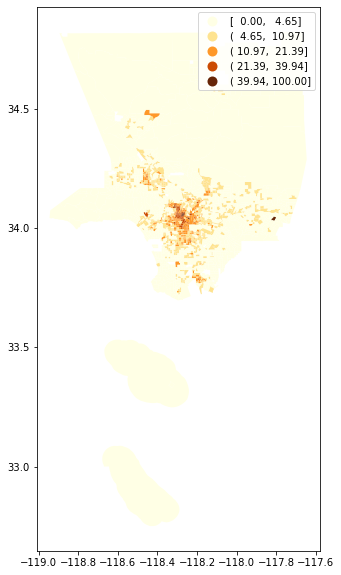

In [23]:
LA_com.plot(figsize=(12,10),
                 column='Percent Public transportation (excluding taxicab)',
                 legend=True, 
                 scheme='NaturalBreaks',
                 cmap='YlOrBr')

In [24]:
LA_com_web_mercator = LA_com.to_crs(epsg=3857)

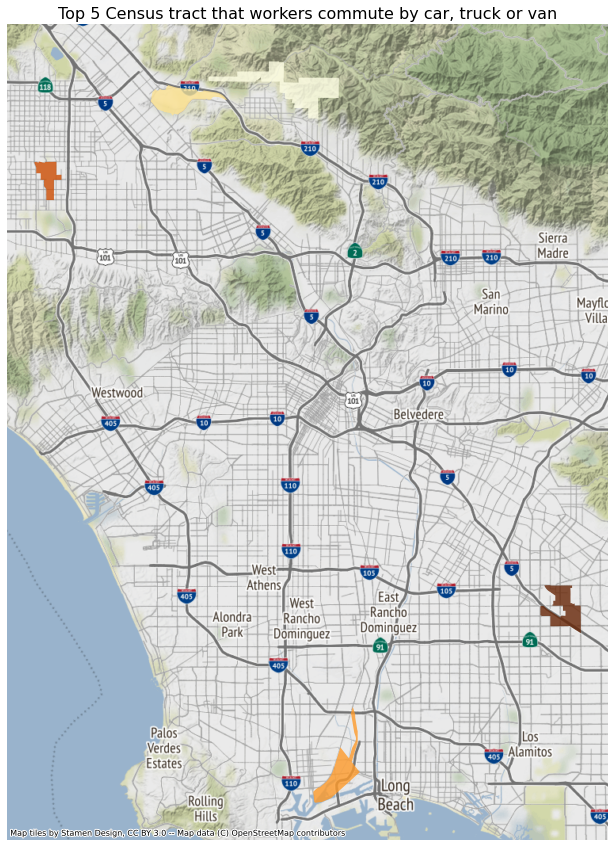

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))

LA_com_web_mercator[LA_com_web_mercator['Percent Car, truck, or van'] >= 100].plot(ax=ax, alpha=0.8, cmap='YlOrBr_r', scheme='NaturalBreaks')

ax.axis('off')
ax.set_title('Top 5 Census tract that workers commute by car, truck or van',fontsize=16)

ctx.add_basemap(ax)

We will choose from one of these census tracts and conduct analysis with OSMnx in the future.

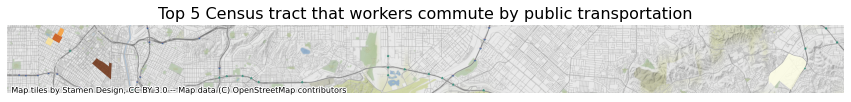

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))

LA_com_web_mercator[LA_com_web_mercator['Percent Public transportation (excluding taxicab)'] >= 52.58].plot(ax=ax, alpha=0.8, cmap='YlOrBr_r', scheme='NaturalBreaks')

ax.axis('off')
ax.set_title('Top 5 Census tract that workers commute by public transportation',fontsize=16)

ctx.add_basemap(ax)

Looks like Census Tract 4032 and Census Tract 2094.02 are the ones we should focus! (Oh, Census Tract 2094.02 is adjacent to MacArther Park, which has highest density in population)

### Exploring Commute Data of Seoul

Data used in this section was also used in 206-shinahaudrey-midterm-part1. seoul_data_com is a csv I created by organizating data downloaded from [KOSTAT](http://kostat.go.kr/portal/eng/index.action) and [서울 열린 데이터 광장](https://data.seoul.go.kr/) (This is 'Seoul open data avenue' when word-for-word translated). KOSTAT is an government institution that provides national statistics. I used population data, number of workers data from KOSTAT and  commute mode data from 서울 열린 데이터 광장.

In [27]:
Seoul_data = gpd.read_file('data/seoul_data_com.csv')

In [28]:
Seoul_data.shape

(425, 14)

In [29]:
Seoul_data.head()

,Gu,Dong,Population,Number of businesses,Number of workers,Walked,Bicycle,Taxicab_motorcycle,Public_transportation,Bus,Subway,Bus_and_subway,Car,geometry
0,종로구,사직동,4765,3541,49536,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3,None
1,종로구,삼청동,1369,712,4577,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3,None
2,종로구,부암동,4348,565,3609,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3,None
3,종로구,평창동,7518,751,3565,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3,None
4,종로구,무악동,3203,581,1598,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3,None


In [30]:
adm_dong_seoul = gpd.read_file('data/adm_dong_seoul.shp')

In [31]:
adm_dong_seoul.crs

<Projected CRS: EPSG:5181>
Name: Korea 2000 / Central Belt
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Korea, Republic of (South Korea) - 126°E to 128°E mainland
- bounds: (126.0, 33.96, 128.0, 38.33)
Coordinate Operation:
- name: Korea Central Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [32]:
adm_dong_seoul.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45..."
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45..."
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45..."
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45..."
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45..."


In [33]:
list(Seoul_data)

['Gu',
 'Dong',
 'Population',
 'Number of businesses',
 'Number of workers',
 'Walked',
 'Bicycle',
 'Taxicab_motorcycle',
 'Public_transportation',
 'Bus',
 'Subway',
 'Bus_and_subway',
 'Car',
 'geometry']

In [34]:
Seoul_data_columnstokeep = ['Gu',
 'Dong',
 'Walked',
 'Bicycle',
 'Taxicab_motorcycle',
 'Public_transportation',
 'Bus',
 'Subway',
 'Bus_and_subway',
 'Car']

In [35]:
Seoul_data = Seoul_data[Seoul_data_columnstokeep]

In [36]:
Seoul_data.sample()

,Gu,Dong,Walked,Bicycle,Taxicab_motorcycle,Public_transportation,Bus,Subway,Bus_and_subway,Car
146,도봉구,쌍문4동,18,2.6,1.6,58.7,24.1,10.4,24.2,19


In [37]:
list(adm_dong_seoul)

['BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', 'OBJECTID', 'geometry']

In [38]:
adm_dong_seoul.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45..."
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45..."
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45..."
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45..."
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45..."


Looks like we can join the two files based on 'Dong' column.

In [39]:
adm_dong_seoul['Dong'] = adm_dong_seoul['ADM_DR_NM']

In [40]:
adm_dong_seoul.head(10)

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry,Dong
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45...",사직동
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45...",삼청동
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45...",부암동
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45...",평창동
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45...",무악동
5,20200630,1101058,교남동,6,"POLYGON ((196720.291 453105.144, 196721.332 45...",교남동
6,20200630,1101060,가회동,7,"POLYGON ((199036.605 454473.750, 199030.268 45...",가회동
7,20200630,1101061,종로1·2·3·4가동,8,"POLYGON ((199061.502 454230.746, 199069.577 45...",종로1·2·3·4가동
8,20200630,1101063,종로5·6가동,9,"POLYGON ((200757.039 453017.729, 200756.917 45...",종로5·6가동
9,20200630,1101064,이화동,10,"POLYGON ((200510.908 453979.009, 200516.753 45...",이화동


In [41]:
adm_dong_seoul = adm_dong_seoul.merge(Seoul_data, on='Dong')

In [42]:
adm_dong_seoul.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 421 entries, 0 to 420
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   BASE_DATE              421 non-null    object  
 1   ADM_DR_CD              421 non-null    object  
 2   ADM_DR_NM              421 non-null    object  
 3   OBJECTID               421 non-null    object  
 4   geometry               421 non-null    geometry
 5   Dong                   421 non-null    object  
 6   Gu                     421 non-null    object  
 7   Walked                 421 non-null    object  
 8   Bicycle                421 non-null    object  
 9   Taxicab_motorcycle     421 non-null    object  
 10  Public_transportation  421 non-null    object  
 11  Bus                    421 non-null    object  
 12  Subway                 421 non-null    object  
 13  Bus_and_subway         421 non-null    object  
 14  Car                    421 non-nul

I have to change the datatype to float from object.

In [43]:
adm_dong_seoul['Walked'] = pd.to_numeric(adm_dong_seoul['Walked'])
adm_dong_seoul['Bicycle'] = pd.to_numeric(adm_dong_seoul['Bicycle'])
adm_dong_seoul['Taxicab_motorcycle'] = pd.to_numeric(adm_dong_seoul['Taxicab_motorcycle'])
adm_dong_seoul['Public_transportation'] = pd.to_numeric(adm_dong_seoul['Public_transportation'])
adm_dong_seoul['Bus'] = pd.to_numeric(adm_dong_seoul['Bus'])
adm_dong_seoul['Subway'] = pd.to_numeric(adm_dong_seoul['Subway'])
adm_dong_seoul['Bus_and_subway'] = pd.to_numeric(adm_dong_seoul['Bus_and_subway'])
adm_dong_seoul['Car'] = pd.to_numeric(adm_dong_seoul['Car'])

In [44]:
adm_dong_seoul.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 421 entries, 0 to 420
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   BASE_DATE              421 non-null    object  
 1   ADM_DR_CD              421 non-null    object  
 2   ADM_DR_NM              421 non-null    object  
 3   OBJECTID               421 non-null    object  
 4   geometry               421 non-null    geometry
 5   Dong                   421 non-null    object  
 6   Gu                     421 non-null    object  
 7   Walked                 421 non-null    float64 
 8   Bicycle                421 non-null    float64 
 9   Taxicab_motorcycle     421 non-null    float64 
 10  Public_transportation  421 non-null    float64 
 11  Bus                    421 non-null    float64 
 12  Subway                 421 non-null    float64 
 13  Bus_and_subway         421 non-null    float64 
 14  Car                    421 non-nul

In [45]:
adm_dong_seoul['Car'].describe()

count    421.000000
mean      21.493112
std        5.950552
min       12.700000
25%       16.700000
50%       21.000000
75%       26.600000
max       34.700000
Name: Car, dtype: float64

In [46]:
adm_dong_seoul['Public_transportation'].describe()

count    421.000000
mean      58.935629
std        6.300375
min       48.300000
25%       54.700000
50%       58.300000
75%       63.200000
max       71.400000
Name: Public_transportation, dtype: float64

It is so surprising that the mean of 'Public_transportation' is 58% and the minimum is 48%.

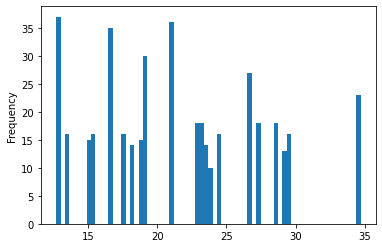

In [47]:
adm_dong_seoul['Car'].plot.hist(bins=70)

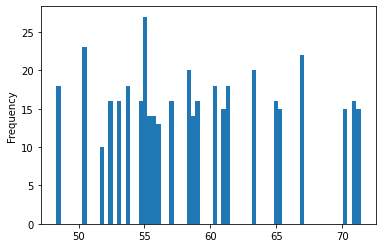

In [48]:
adm_dong_seoul['Public_transportation'].plot.hist(bins=70)

In contrast to LA County's chart, Seoul's percentage distribution has no patterns. There are some have low access to transit and there are also some of the regions that rely heavily on public transit.

Plotting how it looks for both columns 'Car' and 'Public transportation'..

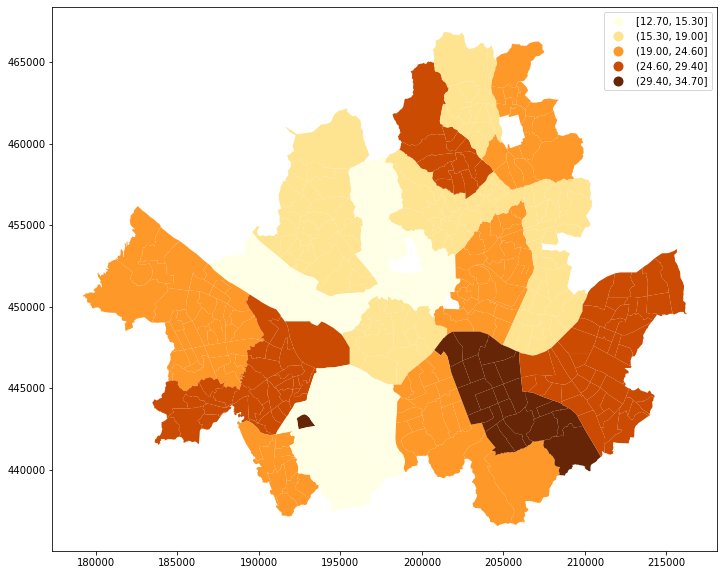

In [49]:
adm_dong_seoul.plot(figsize=(12,10),
                      column='Car',
                      legend=True,
                      scheme='NaturalBreaks',
                      cmap='YlOrBr')

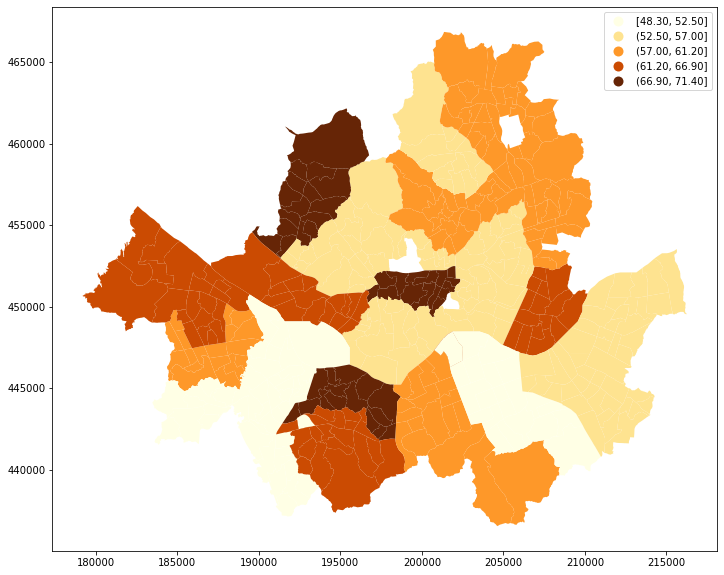

In [50]:
adm_dong_seoul.plot(figsize=(12,10),
                      column='Public_transportation',
                      legend=True,
                      scheme='NaturalBreaks',
                      cmap='YlOrBr')

As we saw through the charts, the percentage differs on the region and it is hard to find the pattern. This made me to think that maybe there are other reasons for choosing their mode to work.

I am going to see where are the region that has highest value for 'Percent Car, truck, or van'.

In [51]:
adm_dong_seoul.sort_values(['Public_transportation'], ascending=False)

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry,Dong,Gu,Walked,Bicycle,Taxicab_motorcycle,Public_transportation,Bus,Subway,Bus_and_subway,Car
25,20200630,1102068,중림동,27,"POLYGON ((197349.942 451382.862, 197352.515 45...",중림동,중구,12.5,0.3,0.9,71.4,35.9,6.4,29.1,14.9
16,20200630,1102052,소공동,18,"POLYGON ((197854.172 452189.892, 197855.710 45...",소공동,중구,12.5,0.3,0.9,71.4,35.9,6.4,29.1,14.9
30,20200630,1102073,동화동,32,"POLYGON ((201694.374 451528.769, 201701.600 45...",동화동,중구,12.5,0.3,0.9,71.4,35.9,6.4,29.1,14.9
29,20200630,1102072,청구동,31,"POLYGON ((201434.770 451090.640, 201453.950 45...",청구동,중구,12.5,0.3,0.9,71.4,35.9,6.4,29.1,14.9
28,20200630,1102071,약수동,30,"POLYGON ((201172.921 450464.967, 201196.217 45...",약수동,중구,12.5,0.3,0.9,71.4,35.9,6.4,29.1,14.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,20200630,1119054,여의동,287,"POLYGON ((193352.229 448919.725, 193355.994 44...",여의동,영등포구,19.4,3.5,0.2,48.3,19.7,7.4,21.2,28.6
293,20200630,1119072,대림3동,300,"POLYGON ((190897.901 445134.900, 190898.940 44...",대림3동,영등포구,19.4,3.5,0.2,48.3,19.7,7.4,21.2,28.6
295,20200630,1119074,영등포동,302,"POLYGON ((191746.495 448065.528, 191746.103 44...",영등포동,영등포구,19.4,3.5,0.2,48.3,19.7,7.4,21.2,28.6
296,20200630,1119075,도림동,303,"POLYGON ((192042.025 445888.152, 192033.468 44...",도림동,영등포구,19.4,3.5,0.2,48.3,19.7,7.4,21.2,28.6


Looks like the Dongs in 중구(Jung-gu) have the most highest percentage for choosing public transit for trip to work.

In [52]:
adm_dong_seoul.sort_values(['Car'], ascending=False)

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry,Dong,Gu,Walked,Bicycle,Taxicab_motorcycle,Public_transportation,Bus,Subway,Bus_and_subway,Car
370,20200630,1123075,수서동,375,"POLYGON ((209141.950 443707.377, 209152.831 44...",수서동,강남구,12.9,1.9,0.0,50.5,27.4,10.6,12.5,34.7
366,20200630,1123071,개포4동,371,"POLYGON ((204577.777 442817.632, 204598.047 44...",개포4동,강남구,12.9,1.9,0.0,50.5,27.4,10.6,12.5,34.7
324,20200630,1121068,신사동,330,"POLYGON ((192521.260 442506.253, 192441.190 44...",신사동,강남구,12.9,1.9,0.0,50.5,27.4,10.6,12.5,34.7
374,20200630,1123079,대치2동,379,"POLYGON ((206381.614 444504.004, 206381.641 44...",대치2동,강남구,12.9,1.9,0.0,50.5,27.4,10.6,12.5,34.7
373,20200630,1123078,청담동,378,"POLYGON ((204111.164 448271.292, 204113.706 44...",청담동,강남구,12.9,1.9,0.0,50.5,27.4,10.6,12.5,34.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,20200630,1120055,상도3동,308,"POLYGON ((193851.312 444895.208, 193856.681 44...",상도3동,동작구,13.8,1.6,1.8,70.1,39.0,6.1,25.0,12.7
300,20200630,1120054,상도2동,307,"POLYGON ((195632.159 445330.769, 195632.707 44...",상도2동,동작구,13.8,1.6,1.8,70.1,39.0,6.1,25.0,12.7
299,20200630,1120053,상도1동,306,"POLYGON ((195864.068 445455.358, 195868.797 44...",상도1동,동작구,13.8,1.6,1.8,70.1,39.0,6.1,25.0,12.7
298,20200630,1120052,노량진2동,305,"POLYGON ((194576.498 446287.909, 194583.129 44...",노량진2동,동작구,13.8,1.6,1.8,70.1,39.0,6.1,25.0,12.7


Looks like the Dongs in 강남구(Gangnam-gu) have the most highest percentage for choosing car for trip to work. The result is same as what I expected. Gangnam-gu is mostly consisted of big grid street patterns.

Let's plot this on contextily basemap.

In [53]:
adm_dong_seoul_web_mercator = adm_dong_seoul.to_crs(epsg=3857)

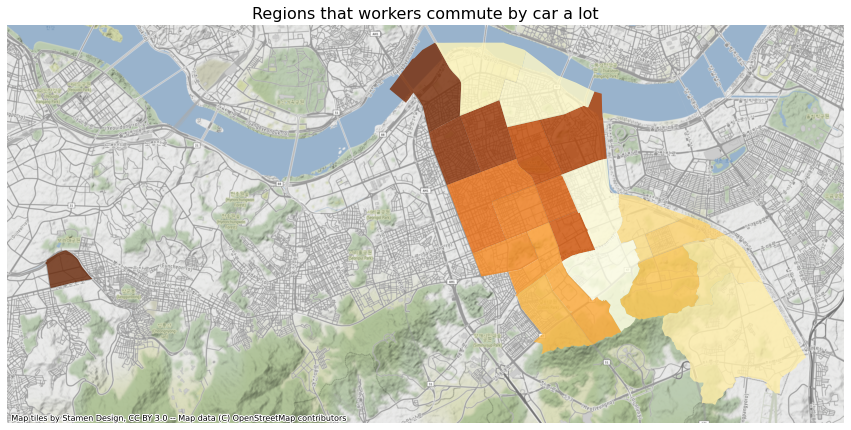

In [54]:
fig, ax = plt.subplots(figsize=(15, 15))

adm_dong_seoul_web_mercator[adm_dong_seoul_web_mercator['Car'] >= 34.7].plot(ax=ax, alpha=0.8, cmap='YlOrBr_r', scheme='NaturalBreaks')
#26 is the 75th percentile of Percent Car, truck, or van

ax.axis('off')
ax.set_title('Regions that workers commute by car a lot',fontsize=16)

ctx.add_basemap(ax)

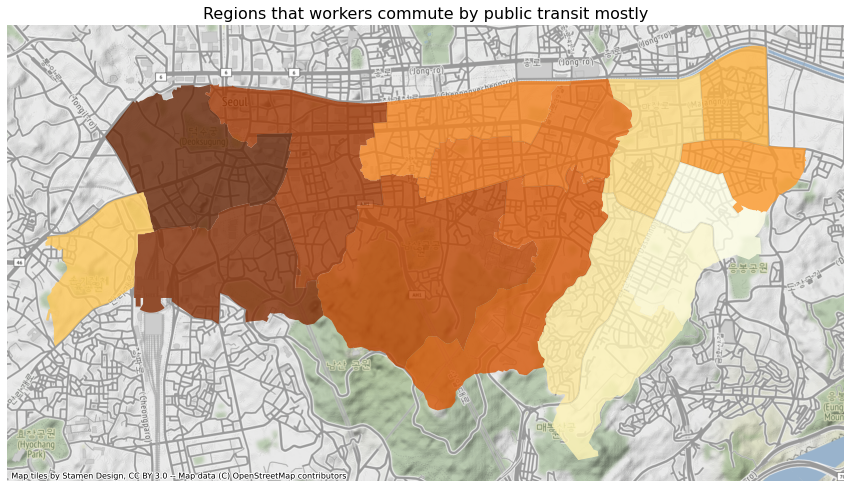

In [55]:
fig, ax = plt.subplots(figsize=(15, 15))

adm_dong_seoul_web_mercator[adm_dong_seoul_web_mercator['Public_transportation'] >= 71.4].plot(ax=ax, alpha=0.8, cmap='YlOrBr_r', scheme='NaturalBreaks')
#26 is the 75th percentile of Percent Car, truck, or van

ax.axis('off')
ax.set_title('Regions that workers commute by public transit mostly',fontsize=16)

ctx.add_basemap(ax)

We will use one of the 'Dong' from the 'Gu' that is displayed above to conduct analysis with OSMnx for trasit-oriented neighborhoods and car-centric neighborhoods .

**-THIS IS THE END OF '206-shinahaudrey-midterm-part3'- **   

**This notebook is created by Shinah**